In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Iris (1).csv')

In [4]:
df.head(5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
df.head(5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

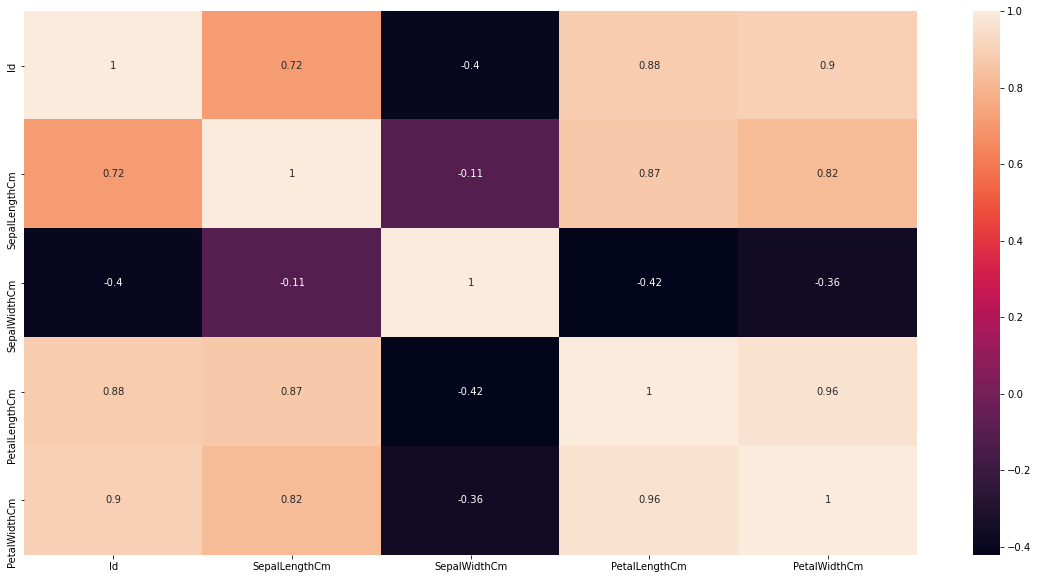

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize = (20,10))  
sns.heatmap(corr,annot=True)

In [8]:
x = df.iloc[:, [1, 2, 3, 4]].values

In [9]:
# K-Means

In [11]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

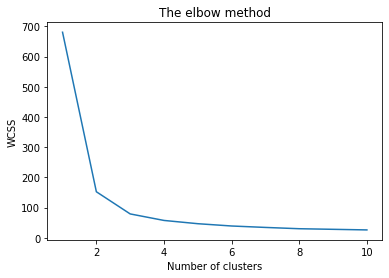

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

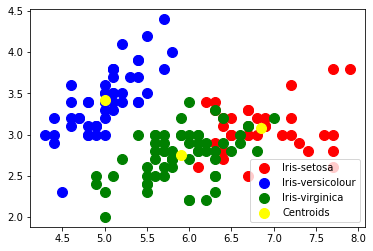

In [14]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

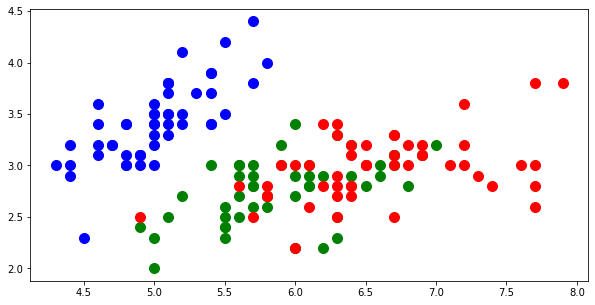

In [16]:
plt.subplots(figsize=(10,5))
#lt.scatter(X, hue='Species')
plt.scatter(x[df['Species'] == 'Iris-setosa', 0], x[df['Species'] == 'Iris-setosa', 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[df['Species'] == 'Iris-versicolor', 0], x[df['Species'] == 'Iris-versicolor', 1], s = 100, c = 'green', label = 'Iris-versicolor')
plt.scatter(x[df['Species'] == 'Iris-virginica', 0], x[df['Species'] == 'Iris-virginica', 1], s = 100, c = 'red', label = 'Iris-virginica')


In [ ]:
# Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [ ]:
y_hclabel=hc.labels_
y_hclabel

In [ ]:
plt.scatter(x[y_hc == 0, 1], x[y_hc == 0, 2], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 2], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')
plt.title('Hierarchical clustering for IRIS Dataset')
plt.legend()